<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2020/%EC%B5%9C%EC%9E%90%EC%98%81/DIP_Numpy02_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# image load

In [ ]:
import numpy as np
import cv2
from skimage import data

In [ ]:
cat_rgb = data.chelsea() # take the test image of cat!
cat_gray = cv2.cvtColor(cat_rgb,cv2.COLOR_BGR2GRAY) #gray스케일로 바꿨음

print(f"ndim:{cat_rgb.ndim},shape:{cat_rgb.shape},dtype:{cat_rgb.dtype},itemsize:{cat_rgb.itemsize}")
print(f"ndim:{cat_gray.ndim},shape:{cat_gray.shape},dtype:{cat_gray.dtype},itemsize:{cat_gray.itemsize}")
# ndim = 높이,넓이,채널 수 그레이스케일음 1,0이라 채널 ,item size 는 1 byte

ndim:3,shape:(300, 451, 3),dtype:uint8,itemsize:1
ndim:2,shape:(300, 451),dtype:uint8,itemsize:1


# 이미지 옆에 붙이기

In [ ]:
cat_hstack = np.hstack( (cat_rgb,cat_rgb) ) #horizontal 로 stack(붙임)
print(cat_hstack.shape)

(300, 902, 3)


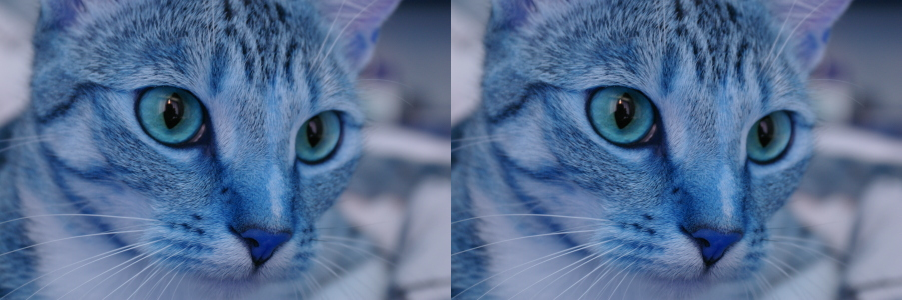

In [ ]:
#opencv로 imshow방법 (BRG기본)
from google.colab.patches import cv2_imshow
cv2_imshow(cat_hstack)

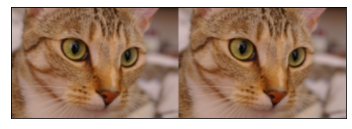

In [ ]:
#맷플롭으로 imshow방법 (RGB기본)
import matplotlib.pyplot as plt
plt.imshow(cat_hstack, interpolation='bicubic')
plt.xticks([]); plt.yticks([])
plt.show()

# 이미지 위아래로 붙이기 = VSTACK

In [ ]:
cat_vstack = np.vstack( (cat_rgb,cat_rgb)) #맨처음이 위에 있는 그림
print(cat_vstack.shape)

(600, 451, 3)


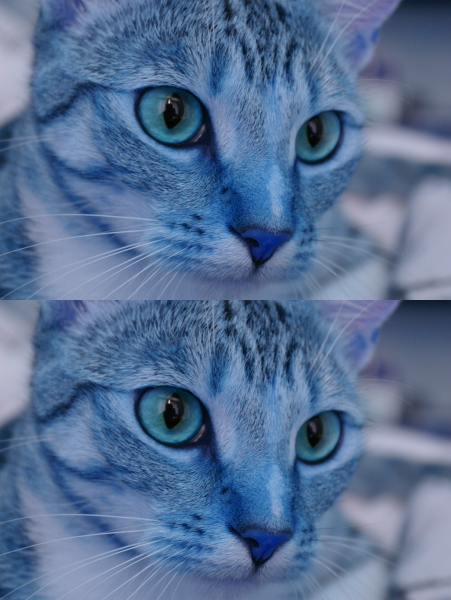

In [ ]:
cv2_imshow(cat_vstack)

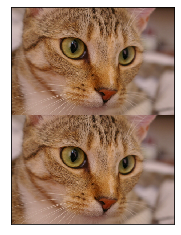

In [ ]:
plt.imshow(cat_vstack, interpolation='nearest')
plt.xticks([]),plt.yticks([])
plt.show()

# 축을 지정하여 붙이기.=concatenate

`np.concatenate(ndarrays' tuple, axis=0)`

axis 0이면 v_stack

axis 1이면 h_stack과 같음


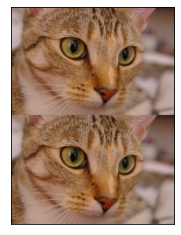

In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=0 )
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

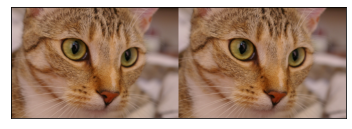

In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=1 )
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
r = np.concatenate( (cat_rgb,cat_rgb) , axis=2 )
# 6치원 그림으로 볼 수 없음 ,최대 4채널이므로 
print(r.shape)
'''
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()
'''
#의료영상에서 쓰이기도 하므로 알아놓기는 해야함

(300, 451, 6)


'\nplt.imshow(r)\nplt.xticks([]),plt.yticks([])\nplt.show()\n'

In [ ]:
plt.imshow(r[:.:.::3]) #:처음부터 시작 300,451, // 0,1,2채널만 써서 나오도록 
# r[:.:.::2])
plt.xticks([]),plt.yticks([])
plt.show()

SyntaxError: ignored

# 새로운 축으로 병합


In [ ]:
r = np.stack( (cat_rgb,cat_rgb), axis=0)
print(r.shape) #앞에 2

(2, 300, 451, 3)


In [ ]:

r = np.stack( (cat_rgb,cat_rgb), axis=-1)
print(r.shape)  #뒤에 2 (axis=-1)

(300, 451, 3, 2)


In [ ]:
r = np.stack( (cat_rgb,cat_rgb), axis=1)
print(r.shape)  #h_stack,v_stack = 위,옆 쌓기, stack= 새로운 축병합

(300, 2, 451, 3)


(300, 451)
(300, 451, 3)


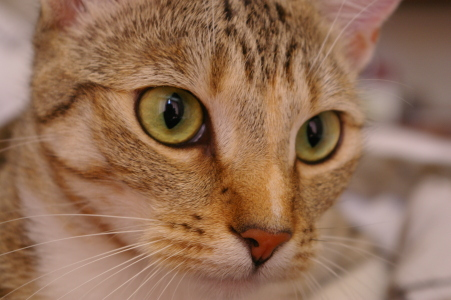

In [ ]:
print(cat_rgb[:,:,2].shape)
r = np.stack( (cat_rgb[:,:,2],cat_rgb[:,:,1],cat_rgb[:,:,0]) , axis=2 )
print(r.shape)
cv2_imshow(r)
# plt.imshow(r)
# plt.xticks([]),plt.yticks([])
# plt.show()  


# 수평으로 분리하기

In [ ]:
img_hsplit= np.hsplit(cat_rgb[:,:450,:],3)
print(np.shape(img_hsplit))

(3, 300, 150, 3)


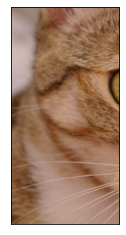

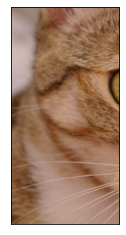

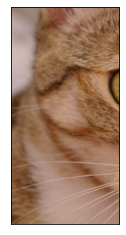

In [ ]:
for idx in range (np.shape(img_hsplit)[0]):
  plt.imshow(img_hsplit[0])
  plt.xticks([]),plt.yticks([])
  plt.show()

In [ ]:
img_hsplit= np.hsplit(cat_rgb,(200,300,350))
print(len(img_hsplit))

for idx, c in enumerate(img_hsplit): #반복 +인덱스: enumerate
  print(f"{idx:02d}, {c.shape}") #200~300.300~350,350~450 ??

4
00, (300, 200, 3)
01, (300, 100, 3)
02, (300, 50, 3)
03, (300, 101, 3)


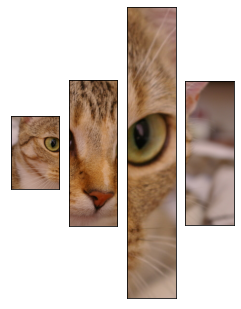

In [ ]:
plt.figure(figsize=(4,7)) 
plt.subplot(1,4,1)   #subplot은 1부터 시작 //공부 한번 해보세요
plt.imshow(img_hsplit[0])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(img_hsplit[1])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,3)
plt.imshow(img_hsplit[2])
plt.xticks([]),plt.yticks([])

plt.subplot(1,4,4)
plt.imshow(img_hsplit[3])
plt.xticks([]),plt.yticks([])

plt.show()



# 수직으로 분리하기 = vsplit

In [ ]:
img_vsplit = np.vsplit(cat_rgb,2)
print(np.shape(img_vsplit))

(2, 150, 451, 3)


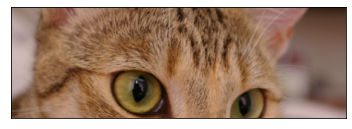

In [ ]:
plt.imshow(img_vsplit[0])
plt.xticks([]),plt.yticks([])
plt.show()     #튜플로 범위 지정 가능

# 축을 지정하여 분리 split

`np.split( ndarrays' tuple, indice tuple, axis=0)`

In [ ]:
img_mono = np.split(cat_rgb,3,axis=-1) #axis=-1 맨끝, 채널로 자르기
print(np.shape(img_mono))

(3, 300, 451, 1)


(300, 451, 1)
(300, 451)


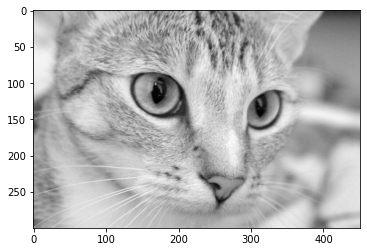

In [ ]:
print(img_mono[0].shape)
r = np.squeeze(img_mono[0])
print(r.shape)
plt.imshow(np.squeeze(img_mono[0]),cmap='gray') #squeeze :(300, 451, 1) -> intensity 1로만 (300, 451)
# plt.xstick([])
# plt.ystick([])
plt.show()

(300, 451, 1)
(300, 451)


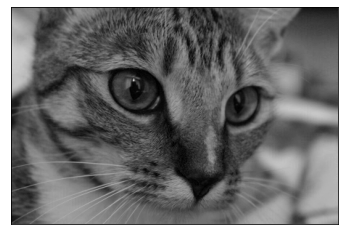

In [ ]:
print(img_mono[2].shape)
r = np.squeeze(img_mono[2])
print(r.shape)
plt.imshow(np.squeeze(img_mono[2]),cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

(300, 451) <class 'numpy.ndarray'>


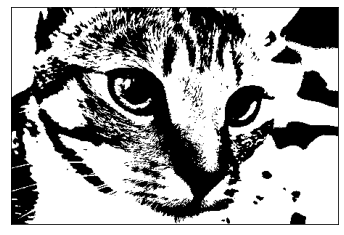

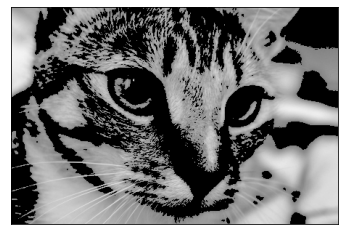

In [ ]:
mask = np.where(cat_gray>100,1,0) #100보다 큰 값의 조건,true인 값 1,false 값 0
print(mask.shape,type(mask))
plt.figure()
plt.imshow(mask,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()
#cat_gray[1.1] * mask[1,1] =r[1,1] mask 연산 ,binary image
r = cat_gray * mask
plt.figure()
plt.imshow(r,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()


In [ ]:
mask2 = np.where(cat_gray>100) 
print(np.shape(mask2))
mask2
# 100 초과 2개 (??)

(2, 82502)


(array([  0,   0,   0, ..., 299, 299, 299]),
 array([  0,   1,   2, ..., 448, 449, 450]))

(300, 451)


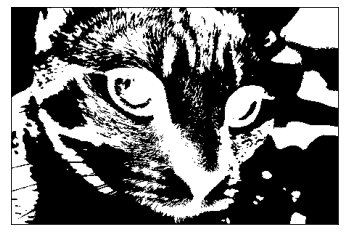

In [ ]:
mask2 = np.where(cat_gray>100,0,1) 
print(np.shape(mask2))
plt.imshow(mask2,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

# 조건에 의한 indexing

True, False로 구성된 ndarray(or mask)를 통한 **특정 ndarray**에  indexing.


`np.where (조건식, [,True일때 값, False일때 값])`
* 조건식에 해당(조건식이 True인) 인덱스의 tuple or 조건식의 결과에 따라 변경된 값으로 채워진 `ndarray`를 반환.


(300, 451) <class 'numpy.ndarray'>


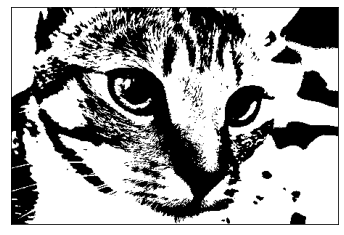

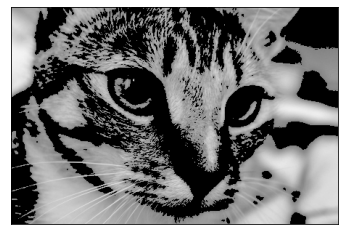

In [ ]:
mask = np.where(cat_gray>100,1,0) #100보다 큰 값의 조건,true인 값 1,false 값 0
print(mask.shape,type(mask))
plt.figure()
plt.imshow(mask,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()
#cat_gray[1.1] * mask[1,1] =r[1,1] mask 연산 ,binary image
r = cat_gray * mask
plt.figure()
plt.imshow(r,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()


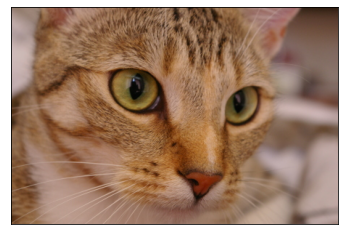

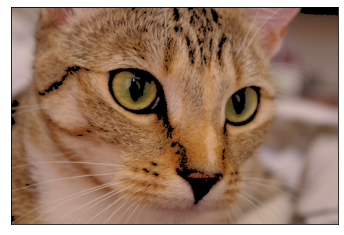

In [ ]:
plt.figure()
plt.imshow(cat_rgb)
plt.xticks([]),plt.yticks([])
plt.show()

r = cat_rgb.copy()  # .copy() 복제
r[cat_gray<50] = (0,0,0) #조건을[]안에 넣었음 (r,g,b)값 다 0으로 만듦
plt.figure()
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

`np.where( ndarray, 조건식 )`

* 조건식에 해당하는(True인) index를 반환함.
* 차원이 2이상일 경우, 차원수에 해당하는 갯수의 `list`를 반환.

In [ ]:
indice = np.where(cat_gray<10)
print(np.shape(indice)) # 293개의 pixel의 인덱스...
r = np.stack( (indice[0],indice[1]),axis=-1)
print(cat_gray[r[0][0],r[0][1]])
r[0:10]

(2, 293)
8


array([[ 91, 187],
       [ 91, 188],
       [ 92, 189],
       [ 92, 190],
       [ 93, 174],
       [ 93, 175],
       [ 93, 190],
       [ 94, 174],
       [ 94, 175],
       [ 94, 176]])

# 통계적 처리

`np.mean()`, `np.max`, `np.min`

In [ ]:
g_m = np.mean(cat_gray)
print(g_m) # 모든 수에 대해 계산됨.

108.20492978566149


In [ ]:
rgb_m = np.mean(cat_rgb)
print(rgb_m) # 모든 수에 대해 계산됨.

115.30514166050752


In [ ]:
rgb_m = np.mean(cat_rgb, axis=-1)
print(rgb_m.shape) # 모든 채널을 바탕으로..

(300, 451)


In [ ]:
rgb_m = np.mean(cat_rgb, axis=0)
print(rgb_m.shape) # axis=0를 바탕으로 평균을 계산. 즉 결과는 column으로 남음.

(451, 3)


**TEST**

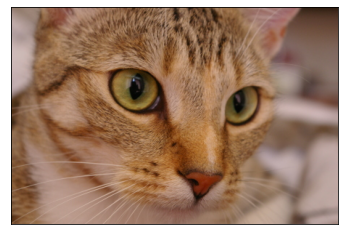

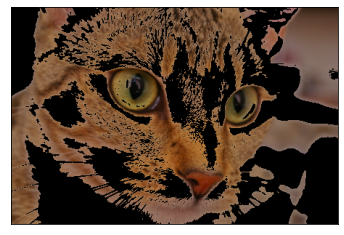

In [ ]:
plt.figure()
plt.imshow(cat_rgb)
plt.xticks([]),plt.yticks([])
plt.show()
rgb_m = np.mean(cat_rgb)
r = cat_rgb.copy()  # .copy() 복제
r[cat_gray>rgb_m] = (0,0,0) #조건을[]안에 넣었음 (r,g,b)값 다 0으로 만듦
plt.figure()
plt.imshow(r)
plt.xticks([]),plt.yticks([])
plt.show()

# 기타

In [ ]:
a = np.array([[1,2,3,4,0],[0,4,3,2,1]])
np.nonzero(a)

(array([0, 0, 0, 0, 1, 1, 1, 1]), array([0, 1, 2, 3, 1, 2, 3, 4]))

In [ ]:
np.all([1,1,1])

True

In [ ]:
np.all([1,1,0])

False

In [ ]:
np.any([1,1,1])

True

In [ ]:
np.any([1,1,0])

True

In [ ]:
np.any([0,0,0])

False

In [ ]:
a = np.arange(0,10)
b = np.arange(0,10)
c = a #실제적으로 a,b는 같은 객체를 가르키고 있는 별칭관계.

print(id(a))
print(id(b))
print(id(c))

139629294880928
139629294880048
139629294880928


In [ ]:
b[a>5] = 0
b

array([0, 1, 2, 3, 4, 5, 0, 0, 0, 0])

In [ ]:
np.all(a==b)

False

In [ ]:
np.all(a==c)

True

In [ ]:
a is b

False

In [ ]:
a is c

True

In [ ]:
a is a

True

In [ ]:
d = a.copy()
a is d

False

In [ ]:
np.all(a == d)

True